In [98]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [34]:
# Get DSCI521-project/data directory
current_dir = os.getcwd()
parent = os.path.dirname(current_dir)

# Read csv file 
dataset = pd.read_csv(parent+"/data/heart_disease_uci.csv", sep = ",", header = 0)

# Ensure dataset was loaded
dataset.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Demographic Data Exhibition

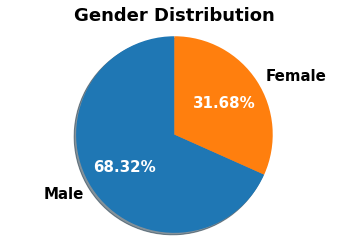

In [153]:
# Gender 
# 1 - male, 0 - female
gender = dataset["sex"].tolist()
total_count = len(dataset)
male_count = sum(a for a in gender if a)
female_count = total_count - male

labels = "Male","Female"
percent = [male_count/total_count, female_count/total_count]

# fig1, ax1 = plt.figure(figsize=(15,4))
fig1, ax1 = plt.subplots()
patches, texts, autotexts  = ax1.pie(percent, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)

ax1.set_title("Gender Distribution", fontsize = 18, fontweight = "bold")

for autotext,text in zip(autotexts,texts):
    autotext.set_color("w")
    autotext.set_size(15)
    autotext.set_weight("bold")
    text.set_size(15)
    text.set_weight("bold")
    
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [46]:
help(ax1.pie)

Help on method pie in module matplotlib.axes._axes:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=None, data=None) method of matplotlib.axes._subplots.AxesSubplot instance
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.  If ``sum(x) < 1``, then the values of *x* give
    the fractional area directly and the array will not be normalized. The
    resulting pie will have an empty wedge of size ``1 - sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : 1D array-like
        The wedge sizes.
    
    explode : array-like, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the r

# Age Distribution

In [99]:
# Age 
age_ls = dataset["age"].tolist()

min_age, max_age = dataset["age"][dataset["age"].idxmin].item(), dataset["age"][dataset["age"].idxmax].item()

In [100]:
print("Maximum age: "+ str(max_age))
print("Minimum age: "+ str(min_age))

Maximum age: 77
Minimum age: 29


In [141]:
age_dict = Counter()
labels = []
# 1 - 
age_groups_dict = Counter()
for age in age_ls:
    age_dict[age] += 1
    
sorted_age_dict = dict(sorted(age_dict.items(), key = lambda x: x[0]))
keys = set(sorted_age_dict.keys())

for i, age in enumerate(range(min_age, max_age, 5)):
    labels.append(str(age)+"-"+str(age+4))
    for index in range(age,age+5,1):
        if index in keys:
            age_groups_dict[i] += sorted_age_dict[index]

count = [value for value in age_groups_dict.values()]

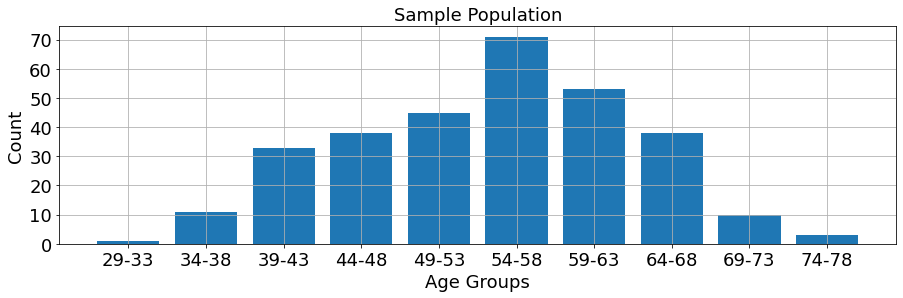

In [151]:
plt.figure(figsize=(15,4))
plt.bar(labels,count)
plt.title('Sample Population', fontsize=18)
plt.xlabel('Age Groups', fontsize=18)
plt.xticks(fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.show()